In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.3 MB/s eta 0:00:00


# **Algerian dataset**

In [5]:
df = pd.read_csv("../Dataset/Algerian_forest_fires_dataset_CLEANED.csv")
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns = df.columns.str.strip()
df['Classes'] = df['Classes'].str.strip()
df = df[df['Classes'] != "Classes"]
print(df['Classes'].unique())
print(df['Classes'].value_counts())



['not fire' 'fire']
Classes
fire        137
not fire    106
Name: count, dtype: int64


In [6]:
numeric_cols = ['day','month','year','Temperature','RH','Ws','Rain',
                'FFMC','DMC','DC','ISI','BUI']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

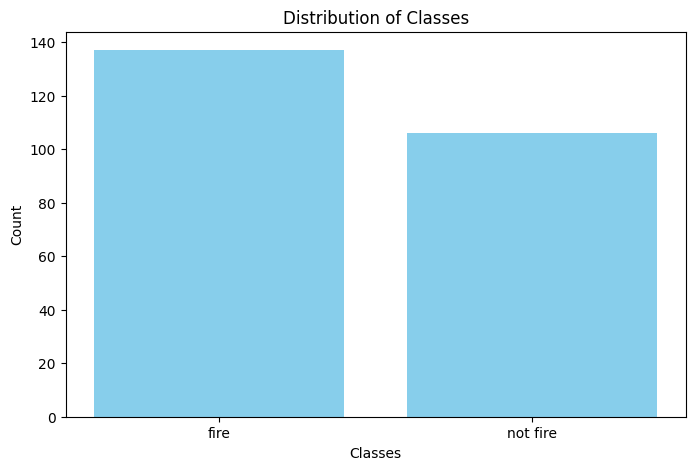

In [7]:
import matplotlib.pyplot as plt

counts = df['Classes'].value_counts()
# plt for Distribution of Classes
plt.figure(figsize=(8,5))
plt.bar(counts.index, counts.values, color='skyblue')
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Distribution of Classes")
plt.show()

In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [9]:
X = df[numeric_cols]
y = df['Classes']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Random Forest**

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score, classification_report

In [12]:
# Random forest
rf = RandomForestClassifier(random_state=42)

# Grid Search
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2", None]
}

grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best params:", grid_rf.best_params_)
print("Best CV Accuracy:", grid_rf.best_score_)

# 5 Cross-Validation
best_rf = grid_rf.best_estimator_
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring="accuracy")
print("CV Scores:", cv_scores)
print("Mean CV:", cv_scores.mean())

# Test evaluation
y_pred_rf = best_rf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))
f1_fire = f1_score(y_test, y_pred_rf, average='weighted')
print(f" F1 Score: {f1_fire:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Best params: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 0.9793522267206478
CV Scores: [0.97435897 1.         0.94871795 1.         0.97368421]
Mean CV: 0.9793522267206478
Test Accuracy: 0.9795918367346939
 F1 Score: 0.9796

Classification Report:
               precision    recall  f1-score   support

        fire       1.00      0.96      0.98        27
    not fire       0.96      1.00      0.98        22

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



**SVM**

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,f1_score

In [14]:
from sklearn.preprocessing import StandardScaler

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# SVM
svm = SVC(probability=True, random_state=42)

# Grid Search
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}
grid_svm = GridSearchCV(svm, param_grid, cv=5, scoring="accuracy")
grid_svm.fit(X_train_scaled, y_train)

print("Best params:", grid_svm.best_params_)
print("Best CV Accuracy:", grid_svm.best_score_)

# 5 Cross-Validation
best_svm = grid_svm.best_estimator_
cv_scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=5, scoring="accuracy")
print("CV Scores:", cv_scores)
print("Mean CV:", cv_scores.mean())

# Test evaluation
y_pred_svm = best_svm.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred_svm))
f1_fire = f1_score(y_test, y_pred_svm, average='weighted')
print(f"F1 Score: {f1_fire:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Best params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Accuracy: 0.9742240215924426
CV Scores: [0.97435897 0.97435897 0.97435897 0.97435897 0.97368421]
Mean CV: 0.9742240215924426
Test Accuracy: 0.9795918367346939
F1 Score: 0.9795

Classification Report:
               precision    recall  f1-score   support

        fire       0.96      1.00      0.98        27
    not fire       1.00      0.95      0.98        22

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



**Logistic Regression**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,f1_score

In [17]:
from sklearn.preprocessing import StandardScaler

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Grid Search
param_grid = {"C": [0.01, 0.1, 1, 10], "penalty": ["l2"]}
grid_log = GridSearchCV(log_reg, param_grid, cv=5, scoring="accuracy")
grid_log.fit(X_train_scaled, y_train)

print("Best params:", grid_log.best_params_)
print("Best CV Accuracy:", grid_log.best_score_)

# 5 Cross-Validation
best_log = grid_log.best_estimator_
cv_scores = cross_val_score(best_log, X_train_scaled, y_train, cv=5, scoring="accuracy")
print("CV Scores:", cv_scores)
print("Mean CV:", cv_scores.mean())

# Test evaluation
y_pred_log = best_log.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred_log))
f1_fire = f1_score(y_test, y_pred_log, average='weighted')
print(f" F1 Score: {f1_fire:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Best params: {'C': 10, 'penalty': 'l2'}
Best CV Accuracy: 0.9844804318488529
CV Scores: [0.97435897 1.         1.         0.97435897 0.97368421]
Mean CV: 0.9844804318488529
Test Accuracy: 0.9795918367346939
 F1 Score: 0.9795

Classification Report:
               precision    recall  f1-score   support

        fire       0.96      1.00      0.98        27
    not fire       1.00      0.95      0.98        22

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



XGBoost

In [19]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [20]:
# Encode labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [21]:
# XGBoost
xgb = XGBClassifier(
    random_state=42,
    eval_metric="mlogloss"
)

# Grid Search
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_xgb.fit(X_train, y_train_enc)

print("Best params:", grid_xgb.best_params_)
print("Best CV Accuracy:", grid_xgb.best_score_)

# 5 Cross-Validation
best_xgb = grid_xgb.best_estimator_
cv_scores = cross_val_score(best_xgb, X_train, y_train_enc, cv=5, scoring="accuracy")
print("CV Scores:", cv_scores)
print("Mean CV:", cv_scores.mean())

# Test evaluation
y_pred_xgb = best_xgb.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test_enc, y_pred_xgb))
f1_fire = f1_score(y_test_enc, y_pred_xgb, average='weighted')
print(f"F1 Score: {f1_fire:.4f}")
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred_xgb, target_names=le.classes_))

Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best CV Accuracy: 0.9843454790823213
CV Scores: [0.97435897 1.         1.         1.         0.94736842]
Mean CV: 0.9843454790823213
Test Accuracy: 0.9591836734693877
F1 Score: 0.9592

Classification Report:
               precision    recall  f1-score   support

        fire       0.96      0.96      0.96        27
    not fire       0.95      0.95      0.95        22

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49



Catboost

In [22]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [23]:
# Catboost
model = CatBoostClassifier(
    verbose=0,
    random_state=42
)
# Grid Search
param_grid = {
    'iterations': [200, 400],
    'depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

grid_Cat = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

grid_Cat.fit(X_train, y_train)

print("Best params:",grid_Cat.best_params_)
print("Best CV Accuracy:", grid_Cat.best_score_)

# 5 Cross-Validation
best_Cat = grid_Cat.best_estimator_
cv_scores = cross_val_score(best_Cat, X_train, y_train, cv=5, scoring="accuracy")
print("CV Scores:", cv_scores)
print("Mean CV:", cv_scores.mean())

# Test evaluation
y_pred_catboost = best_Cat.predict(X_test)

print("\n Accuracy:", round(accuracy_score(y_test, y_pred_catboost), 4))
f1_fire = f1_score(y_test, y_pred_catboost, average='weighted')
print(f" F1 Score: {f1_fire:.4f}")
print("\n Classification Report:\n", classification_report(y_test, y_pred_catboost))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best params: {'depth': 4, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.05}
Best CV Accuracy: 0.9844804318488529
CV Scores: [0.97435897 1.         0.97435897 1.         0.97368421]
Mean CV: 0.9844804318488529

 Accuracy: 1.0
 F1 Score: 1.0000

 Classification Report:
               precision    recall  f1-score   support

        fire       1.00      1.00      1.00        27
    not fire       1.00      1.00      1.00        22

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



Stacking

In [24]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,f1_score

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


In [26]:
# Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest
rf = RandomForestClassifier(random_state=42)
# Grid Search for rf
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2", None]
}
rf_grid = GridSearchCV(rf, rf_params, cv=cv, scoring="accuracy", n_jobs=-1)
rf_grid.fit(X_train, y_train_enc)
print("Best RF Params:", rf_grid.best_params_)
print("Best RF CV Accuracy:", round(rf_grid.best_score_, 4))
best_RF = rf_grid.best_estimator_


# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

#Scaling
xgb_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", xgb)
])
# Grid Search for xgboost
xgb_params = {
    "clf__n_estimators": [100, 200],
    "clf__max_depth": [3, 5, 7],
    "clf__learning_rate": [0.01, 0.1, 0.2],
    "clf__subsample": [0.8, 1.0],
    "clf__colsample_bytree": [0.8, 1.0]
}

xgb_grid = GridSearchCV(xgb_pipe, xgb_params, cv=cv, scoring="accuracy", n_jobs=-1)
xgb_grid.fit(X_train, y_train_enc)
print("Best XGB Params:", xgb_grid.best_params_)
print("Best XGB CV Accuracy:", round(xgb_grid.best_score_, 4))
best_XGB = xgb_grid.best_estimator_


#  CatBoost
cat = CatBoostClassifier(verbose=0, random_state=42)
# Grid Search for catboost
cat_params = {
    'iterations': [200, 400],
    'depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}
cat_grid = GridSearchCV(cat, cat_params, cv=cv, scoring="accuracy", n_jobs=-1)
cat_grid.fit(X_train, y_train_enc)
print("Best Cat Params:", cat_grid.best_params_)
print("Best Cat CV Accuracy:", round(cat_grid.best_score_, 4))
best_Cat = cat_grid.best_estimator_


# --- Stacking Classifier ---
estimators = [
    ("rf", best_RF),
    ("xgb", best_XGB),
    ("cat", best_Cat)
]
# Stack model
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=cv,
    n_jobs=-1
)

# 5 Cross Validation
scores = cross_val_score(stack_model, X_train, y_train_enc, cv=cv, scoring="accuracy")
print("Stacking CV Accuracy: %.4f ± %.4f" % (scores.mean(), scores.std()))

stack_model.fit(X_train, y_train_enc)

# Test evaluation
y_pred_stack = stack_model.predict(X_test)

print(" Stacking Test Accuracy:", accuracy_score(y_test_enc, y_pred_stack))
f1_fire = f1_score(y_test_enc, y_pred_stack, average='weighted')
print(f" F1 Score: {f1_fire:.4f}")
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred_stack, target_names=le.classes_))


Best RF Params: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RF CV Accuracy: 0.9897


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:02:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB Params: {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 100, 'clf__subsample': 0.8}
Best XGB CV Accuracy: 0.9846
Best Cat Params: {'depth': 4, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Best Cat CV Accuracy: 0.9846
Stacking CV Accuracy: 0.9846 ± 0.0205
 Stacking Test Accuracy: 1.0
 F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

        fire       1.00      1.00      1.00        27
    not fire       1.00      1.00      1.00        22

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



## **ML model  with oversampler for Algerian dataset**


In [27]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

from collections import Counter
print("Class distribution after RandomOverSampler:", Counter(y_train_res))


Class distribution after RandomOverSampler: Counter({'not fire': 110, 'fire': 110})


 Random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,f1_score


In [29]:
# Random Forest
rf = RandomForestClassifier(random_state=42)

# Grid Search
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2", None]
}

grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_rf.fit(X_train_res, y_train_res)

print("Best params:", grid_rf.best_params_)
print("Best CV Accuracy:", grid_rf.best_score_)

# 5 Cross-Validation
best_rf = grid_rf.best_estimator_
cv_scores = cross_val_score(best_rf, X_train_res, y_train_res, cv=5, scoring="accuracy")
print("CV Scores:", cv_scores)
print("Mean CV:", cv_scores.mean())

# Test evaluation
y_pred_rf = best_rf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))
f1_fire = f1_score(y_test, y_pred_rf, average='weighted')
print(f" Overall F1 Score: {f1_fire:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Best params: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 0.9863636363636363
CV Scores: [0.97727273 1.         0.97727273 1.         0.97727273]
Mean CV: 0.9863636363636363
Test Accuracy: 0.9795918367346939
 Overall F1 Score: 0.9796

Classification Report:
               precision    recall  f1-score   support

        fire       1.00      0.96      0.98        27
    not fire       0.96      1.00      0.98        22

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [31]:
from sklearn.preprocessing import StandardScaler

# Scaling
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Grid Search
param_grid = {"C": [0.01, 0.1, 1, 10], "penalty": ["l2"]}
grid_log = GridSearchCV(log_reg, param_grid, cv=5, scoring="accuracy")
grid_log.fit(X_train_res_scaled, y_train_res)

print("Best params:", grid_log.best_params_)
print("Best CV Accuracy:", grid_log.best_score_)

# 5 Cross-Validation
best_log = grid_log.best_estimator_
cv_scores = cross_val_score(best_log, X_train_res_scaled, y_train_res, cv=5, scoring="accuracy")
print("CV Scores:", cv_scores)
print("Mean CV:", cv_scores.mean())

# Test evaluation
y_pred_log = best_log.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred_log))
f1_fire = f1_score(y_test, y_pred_log, average='weighted')
print(f" Overall F1 Score: {f1_fire:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Best params: {'C': 10, 'penalty': 'l2'}
Best CV Accuracy: 0.9818181818181818
CV Scores: [0.97727273 1.         0.97727273 0.97727273 0.97727273]
Mean CV: 0.9818181818181818
Test Accuracy: 1.0
 Overall F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

        fire       1.00      1.00      1.00        27
    not fire       1.00      1.00      1.00        22

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



SVM

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,f1_score

In [34]:
from sklearn.preprocessing import StandardScaler

# Scaling
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [35]:
# SVM
svm = SVC(probability=True, random_state=42)

# Grid Search
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}
grid_svm = GridSearchCV(svm, param_grid, cv=5, scoring="accuracy")
grid_svm.fit(X_train_res_scaled, y_train_res)

print("Best params:", grid_svm.best_params_)
print("Best CV Accuracy:", grid_svm.best_score_)

# 5 Cross-Validation
best_svm = grid_svm.best_estimator_
cv_scores = cross_val_score(best_svm, X_train_res_scaled, y_train_res, cv=5, scoring="accuracy")
print("CV Scores:", cv_scores)
print("Mean CV:", cv_scores.mean())

# Test evaluation
y_pred_svm = best_svm.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred_svm))
f1_fire = f1_score(y_test, y_pred_svm, average='weighted')
print(f" Overall F1 Score: {f1_fire:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


Best params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Accuracy: 0.9727272727272727
CV Scores: [0.97727273 1.         0.95454545 0.95454545 0.97727273]
Mean CV: 0.9727272727272727
Test Accuracy: 0.9795918367346939
 Overall F1 Score: 0.9795

Classification Report:
               precision    recall  f1-score   support

        fire       0.96      1.00      0.98        27
    not fire       1.00      0.95      0.98        22

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



XGboost

In [36]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,f1_score

In [37]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
y_train_res_enc = le.fit_transform(y_train_res)
y_test_enc = le.transform(y_test)


In [38]:
# XGBoost
xgb = XGBClassifier(random_state=42, eval_metric="mlogloss")

# Grid Search
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_xgb.fit(X_train_res, y_train_res_enc)

print("Best params:", grid_xgb.best_params_)
print("Best CV Accuracy:", grid_xgb.best_score_)

# 5 Cross-Validation
best_xgb = grid_xgb.best_estimator_
cv_scores = cross_val_score(best_xgb, X_train_res, y_train_res_enc, cv=5, scoring="accuracy")
print("CV Scores:", cv_scores)
print("Mean CV:", cv_scores.mean())

# Test evaluation
y_pred_xgb = best_xgb.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test_enc, y_pred_xgb))
f1_fire = f1_score(y_test_enc, y_pred_xgb, average='weighted')
print(f" Overall F1 Score: {f1_fire:.4f}")
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred_xgb))


Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best CV Accuracy: 0.9863636363636363
CV Scores: [0.97727273 1.         1.         1.         0.95454545]
Mean CV: 0.9863636363636363
Test Accuracy: 0.9795918367346939
 Overall F1 Score: 0.9796

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.96      1.00      0.98        22

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



Catboost

In [39]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,f1_score
from catboost import CatBoostClassifier


In [40]:
# Catboost
catboost = CatBoostClassifier(
    verbose=0,
    random_state=42
)

# Grid Search
param_grid = {
    'iterations': [200, 400],
    'depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

grid_cat = GridSearchCV(
    estimator=catboost,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_cat.fit(X_train_res, y_train_res)

print(" Best Parameters:", grid_cat.best_params_)
print(" Best CV Accuracy:", grid_cat.best_score_)


# 5 Cross-Validation
best_cat = grid_cat.best_estimator_
cv_scores = cross_val_score(best_cat, X_train_res, y_train_res, cv=5, scoring="accuracy")
print("\n Cross-Validation Scores:", cv_scores)
print(" Mean CV Accuracy:", cv_scores.mean())

# Test evaluation
y_pred = best_cat.predict(X_test)

print("\n Test Accuracy:", round(accuracy_score(y_test, y_pred), 4))
f1_fire = f1_score(y_test, y_pred, average='weighted')
print(f" Overall F1 Score: {f1_fire:.4f}")
print("\n Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
 Best Parameters: {'depth': 6, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.05}
 Best CV Accuracy: 0.9863636363636363

 Cross-Validation Scores: [0.97727273 1.         0.97727273 1.         0.97727273]
 Mean CV Accuracy: 0.9863636363636363

 Test Accuracy: 1.0
 Overall F1 Score: 1.0000

 Classification Report:
               precision    recall  f1-score   support

        fire       1.00      1.00      1.00        27
    not fire       1.00      1.00      1.00        22

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



Stacking

In [41]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,f1_score

In [42]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
y_train_res_enc = le.fit_transform(y_train_res)
y_test_enc = le.transform(y_test)

In [43]:
# Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest
rf = RandomForestClassifier(random_state=42)
#Grid Search for rf
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2", None]
}
rf_grid = GridSearchCV(rf, rf_params, cv=cv, scoring="accuracy", n_jobs=-1)
rf_grid.fit(X_train_res, y_train_res_enc)
print("Best RF Params:", rf_grid.best_params_)
print("Best RF CV Accuracy:", round(rf_grid.best_score_, 4))
best_RF = rf_grid.best_estimator_


# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

#Scaling
xgb_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", xgb)
])
#Grid  for xgboost
xgb_params = {
    "clf__n_estimators": [100, 200],
    "clf__max_depth": [3, 5, 7],
    "clf__learning_rate": [0.01, 0.1, 0.2],
    "clf__subsample": [0.8, 1.0],
    "clf__colsample_bytree": [0.8, 1.0]
}
xgb_grid = GridSearchCV(xgb_pipe, xgb_params, cv=cv, scoring="accuracy", n_jobs=-1)
xgb_grid.fit(X_train_res, y_train_res_enc)
print("Best XGB Params:", xgb_grid.best_params_)
print("Best XGB CV Accuracy:", round(xgb_grid.best_score_, 4))
best_XGB = xgb_grid.best_estimator_


#  CatBoost
cat = CatBoostClassifier(verbose=0, random_state=42)
# Grid Search for catboost
cat_params = {
    'iterations': [200, 400],
    'depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}
cat_grid = GridSearchCV(cat, cat_params, cv=cv, scoring="accuracy", n_jobs=-1)
cat_grid.fit(X_train_res, y_train_res_enc)
print("Best Cat Params:", cat_grid.best_params_)
print("Best Cat CV Accuracy:", round(cat_grid.best_score_, 4))
best_Cat = cat_grid.best_estimator_


# --- Stacking Classifier ---
estimators = [
    ("rf", best_RF),
    ("xgb", best_XGB),
    ("cat", best_Cat)
]
# Stack model
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=cv,
    n_jobs=-1
)

# 5 Cross Validation
scores = cross_val_score(stack_model, X_train_res, y_train_res_enc, cv=cv, scoring="accuracy")
print("Stacking CV Accuracy: %.4f ± %.4f" % (scores.mean(), scores.std()))

stack_model.fit(X_train_res, y_train_res_enc)

# Test evaluation
y_pred_stack = stack_model.predict(X_test)

print(" Stacking Test Accuracy:", accuracy_score(y_test_enc, y_pred_stack))
f1_fire = f1_score(y_test_enc, y_pred_stack, average='weighted')
print(f" Overall F1 Score: {f1_fire:.4f}")
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred_stack, target_names=le.classes_))


Best RF Params: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best RF CV Accuracy: 0.9682


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:14:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB Params: {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 100, 'clf__subsample': 0.8}
Best XGB CV Accuracy: 0.9727
Best Cat Params: {'depth': 6, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Best Cat CV Accuracy: 0.9682
Stacking CV Accuracy: 0.9727 ± 0.0334
 Stacking Test Accuracy: 1.0
 Overall F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

        fire       1.00      1.00      1.00        27
    not fire       1.00      1.00      1.00        22

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



## **ML undersampler for Algerian dataset**

In [44]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


print("Original class distribution:", Counter(y_train))

rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

print("Class distribution after RandomUnderSampler:", Counter(y_train_under))

Original class distribution: Counter({'fire': 110, 'not fire': 84})
Class distribution after RandomUnderSampler: Counter({'fire': 84, 'not fire': 84})


Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,f1_score


In [46]:
# Random Forest
rf = RandomForestClassifier(random_state=42)

# Grid Search
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2", None]
}

grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_rf.fit(X_train_under, y_train_under)

print("Best params:", grid_rf.best_params_)
print("Best CV Accuracy:", grid_rf.best_score_)

# 5 Cross-Validation
best_rf = grid_rf.best_estimator_
cv_scores = cross_val_score(best_rf, X_train_under, y_train_under, cv=5, scoring="accuracy")
print("CV Scores:", cv_scores)
print("Mean CV:", cv_scores.mean())

# Test evaluation
y_pred_rf = best_rf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))
f1_fire = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Overall F1 Score: {f1_fire:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Best params: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Accuracy: 0.9941176470588236
CV Scores: [0.97058824 1.         1.         1.         1.        ]
Mean CV: 0.9941176470588236
Test Accuracy: 1.0
Overall F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

        fire       1.00      1.00      1.00        27
    not fire       1.00      1.00      1.00        22

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [48]:
from sklearn.preprocessing import StandardScaler

# Scaling
scaler = StandardScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

In [49]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Grid Search
param_grid = {"C": [0.01, 0.1, 1, 10], "penalty": ["l2"]}
grid_log = GridSearchCV(log_reg, param_grid, cv=5, scoring="accuracy")
grid_log.fit(X_train_under_scaled, y_train_under)

print("Best params:", grid_log.best_params_)
print("Best CV Accuracy:", grid_log.best_score_)

# 5 Cross-Validation
best_log = grid_log.best_estimator_
cv_scores = cross_val_score(best_log, X_train_under_scaled, y_train_under, cv=5, scoring="accuracy")
print("CV Scores:", cv_scores)
print("Mean CV:", cv_scores.mean())

# Test evaluation
y_pred_log = best_log.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred_log))
f1_fire = f1_score(y_test, y_pred_log, average='weighted')
print(f" Overall F1 Score: {f1_fire:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Best params: {'C': 10, 'penalty': 'l2'}
Best CV Accuracy: 0.9645276292335115
CV Scores: [0.97058824 0.88235294 1.         0.96969697 1.        ]
Mean CV: 0.9645276292335115
Test Accuracy: 0.9795918367346939
 Overall F1 Score: 0.9795

Classification Report:
               precision    recall  f1-score   support

        fire       0.96      1.00      0.98        27
    not fire       1.00      0.95      0.98        22

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



SVM

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,f1_score

In [51]:
from sklearn.preprocessing import StandardScaler

# Scaling
scaler = StandardScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

In [52]:
# SVM
svm = SVC(probability=True, random_state=42)

# Grid Search
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}
grid_svm = GridSearchCV(svm, param_grid, cv=5, scoring="accuracy")
grid_svm.fit(X_train_under_scaled, y_train_under)

print("Best params:", grid_svm.best_params_)
print("Best CV Accuracy:", grid_svm.best_score_)

# 5 Cross-Validation
best_svm = grid_svm.best_estimator_
cv_scores = cross_val_score(best_svm, X_train_under_scaled, y_train_under, cv=5, scoring="accuracy")
print("CV Scores:", cv_scores)
print("Mean CV:", cv_scores.mean())

# Test evaluation
y_pred_svm = best_svm.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred_svm))
f1_fire = f1_score(y_test, y_pred_svm, average='weighted')
print(f" Overall F1 Score: {f1_fire:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


Best params: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Accuracy: 0.982174688057041
CV Scores: [1.         0.94117647 1.         0.96969697 1.        ]
Mean CV: 0.982174688057041
Test Accuracy: 0.9795918367346939
 Overall F1 Score: 0.9795

Classification Report:
               precision    recall  f1-score   support

        fire       0.96      1.00      0.98        27
    not fire       1.00      0.95      0.98        22

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



XGboost

In [53]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,f1_score

In [54]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
y_train_under_enc = le.fit_transform(y_train_under)
y_test_enc = le.transform(y_test)

In [55]:
# XGBoost
xgb = XGBClassifier(random_state=42, eval_metric="mlogloss")

# Grid Search
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_xgb.fit(X_train_under, y_train_under_enc)

print("Best params:", grid_xgb.best_params_)
print("Best CV Accuracy:", grid_xgb.best_score_)

# 5 Cross-Validation
best_xgb = grid_xgb.best_estimator_
cv_scores = cross_val_score(best_xgb, X_train_under, y_train_under_enc, cv=5, scoring="accuracy")
print("CV Scores:", cv_scores)
print("Mean CV:", cv_scores.mean())

# Test evaluation
y_pred_xgb = best_xgb.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test_enc, y_pred_xgb))
f1_fire = f1_score(y_test_enc, y_pred_xgb, average='weighted')
print(f" Overall F1 Score: {f1_fire:.4f}")
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred_xgb))


Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best CV Accuracy: 0.9941176470588236
CV Scores: [0.97058824 1.         1.         1.         1.        ]
Mean CV: 0.9941176470588236
Test Accuracy: 1.0
 Overall F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        22

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



Catboost

In [56]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,f1_score
from catboost import CatBoostClassifier

In [57]:
# Catboost
catboost = CatBoostClassifier(
    verbose=0,
    random_state=42
)

# Grid Search
param_grid = {
    'iterations': [200, 400],
    'depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

grid_cat = GridSearchCV(
    estimator=catboost,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_cat.fit(X_train_under, y_train_under)

print(" Best Parameters:", grid_cat.best_params_)
print(" Best CV Accuracy:", grid_cat.best_score_)


# 5 Cross-Validation
best_cat = grid_cat.best_estimator_
cv_scores = cross_val_score(best_cat, X_train_under, y_train_under, cv=5, scoring="accuracy")
print("\n Cross-Validation Scores:", cv_scores)
print(" Mean CV Accuracy:", cv_scores.mean())

# Test evaluation
y_pred = best_cat.predict(X_test)

print("\n Test Accuracy:", round(accuracy_score(y_test, y_pred), 4))
f1_fire = f1_score(y_test, y_pred, average='weighted')
print(f" Overall F1 Score: {f1_fire:.4f}")
print("\n Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
 Best Parameters: {'depth': 8, 'iterations': 400, 'l2_leaf_reg': 5, 'learning_rate': 0.2}
 Best CV Accuracy: 0.9941176470588236

 Cross-Validation Scores: [0.97058824 1.         1.         1.         1.        ]
 Mean CV Accuracy: 0.9941176470588236

 Test Accuracy: 1.0
 Overall F1 Score: 1.0000

 Classification Report:
               precision    recall  f1-score   support

        fire       1.00      1.00      1.00        27
    not fire       1.00      1.00      1.00        22

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



Stacking

In [58]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,f1_score

In [59]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
y_train_under_enc = le.fit_transform(y_train_under)
y_test_enc = le.transform(y_test)

In [60]:
# Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest
rf = RandomForestClassifier(random_state=42)
#Grid Search for rf
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2", None]
}
rf_grid = GridSearchCV(rf, rf_params, cv=cv, scoring="accuracy", n_jobs=-1)
rf_grid.fit(X_train_res, y_train_res_enc)
print("Best RF Params:", rf_grid.best_params_)
print("Best RF CV Accuracy:", round(rf_grid.best_score_, 4))
best_RF = rf_grid.best_estimator_


# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

#Scaling
xgb_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", xgb)
])
#Grid  for xgboost
xgb_params = {
    "clf__n_estimators": [100, 200],
    "clf__max_depth": [3, 5, 7],
    "clf__learning_rate": [0.01, 0.1, 0.2],
    "clf__subsample": [0.8, 1.0],
    "clf__colsample_bytree": [0.8, 1.0]
}
xgb_grid = GridSearchCV(xgb_pipe, xgb_params, cv=cv, scoring="accuracy", n_jobs=-1)
xgb_grid.fit(X_train_res, y_train_res_enc)
print("Best XGB Params:", xgb_grid.best_params_)
print("Best XGB CV Accuracy:", round(xgb_grid.best_score_, 4))
best_XGB = xgb_grid.best_estimator_


#  CatBoost
cat = CatBoostClassifier(verbose=0, random_state=42)
# Grid Search for catboost
cat_params = {
    'iterations': [200, 400],
    'depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}
cat_grid = GridSearchCV(cat, cat_params, cv=cv, scoring="accuracy", n_jobs=-1)
cat_grid.fit(X_train_res, y_train_res_enc)
print("Best Cat Params:", cat_grid.best_params_)
print("Best Cat CV Accuracy:", round(cat_grid.best_score_, 4))
best_Cat = cat_grid.best_estimator_


# --- Stacking Classifier ---
estimators = [
    ("rf", best_RF),
    ("xgb", best_XGB),
    ("cat", best_Cat)
]
# Stack model
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=cv,
    n_jobs=-1
)

# 5 Cross Validation
scores = cross_val_score(stack_model, X_train_res, y_train_res_enc, cv=cv, scoring="accuracy")
print("Stacking CV Accuracy: %.4f ± %.4f" % (scores.mean(), scores.std()))

stack_model.fit(X_train_res, y_train_res_enc)

# Test evaluation
y_pred_stack = stack_model.predict(X_test)

print("✅ Stacking Test Accuracy:", accuracy_score(y_test_enc, y_pred_stack))
f1_fire = f1_score(y_test_enc, y_pred_stack, average='weighted')
print(f" Overall F1 Score: {f1_fire:.4f}")
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred_stack, target_names=le.classes_))


Best RF Params: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best RF CV Accuracy: 0.9682


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:25:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB Params: {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 100, 'clf__subsample': 0.8}
Best XGB CV Accuracy: 0.9727
Best Cat Params: {'depth': 6, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Best Cat CV Accuracy: 0.9682
Stacking CV Accuracy: 0.9727 ± 0.0334
✅ Stacking Test Accuracy: 1.0
 Overall F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

        fire       1.00      1.00      1.00        27
    not fire       1.00      1.00      1.00        22

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



## **DL model for Agerian dataset**

In [61]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


LSTM

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report,f1_score


In [63]:
#LSTM

# Reshape data to 3D format (samples, timesteps, features)
X_train_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

model_lstm = Sequential([
    LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]),
         kernel_regularizer=regularizers.l2(0.001), return_sequences=False),
    Dropout(0.5),     # to prevent overfitting
    Dense(1, activation="sigmoid")
])

# compile
model_lstm.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Model Training
history_lstm = model_lstm.fit(
    X_train_lstm, y_train_enc,
    validation_data=(X_test_lstm, y_test_enc),
    epochs=50, batch_size=16, verbose=1,
    callbacks=[early_stop]
)

# Test evaluation
loss, acc = model_lstm.evaluate(X_test_lstm, y_test_enc, verbose=0)
print("LSTM Test Accuracy:", acc)

y_pred_probs = model_lstm.predict(X_test_lstm)
y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test_enc, y_pred)
print("Confusion Matrix:")
print(cm)

f1_fire = f1_score(y_test_enc, y_pred, average='weighted')
print(f" Overall F1 Score: {f1_fire:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.5901 - loss: 0.6954 - val_accuracy: 0.7959 - val_loss: 0.5507
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7516 - loss: 0.5080 - val_accuracy: 0.7959 - val_loss: 0.4653
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8091 - loss: 0.4348 - val_accuracy: 0.8163 - val_loss: 0.4173
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8479 - loss: 0.3492 - val_accuracy: 0.8163 - val_loss: 0.4055
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8596 - loss: 0.3456 - val_accuracy: 0.7959 - val_loss: 0.3832
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8156 - loss: 0.3632 - val_accuracy: 0.8163 - val_loss: 0.3778
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8663 - loss: 0.3213 - val_accuracy: 0.8163 - val_loss: 0.3716
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8652 - loss: 0.2734 - val_accuracy: 0.8367 - v

CNN1D

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix, classification_report,f1_score

In [65]:
#CNND1

# Reshape data to 3D format (samples, timesteps, features)
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation="relu",
           kernel_regularizer=regularizers.l2(0.001),
           input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

# compile
model_cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Model Training
history_cnn = model_cnn.fit(
    X_train_cnn, y_train_enc,
    validation_data=(X_test_cnn, y_test_enc),
    epochs=50, batch_size=16, verbose=1,
    callbacks=[early_stop]
)

# Test evaluation
loss, acc = model_cnn.evaluate(X_test_cnn, y_test_enc, verbose=0)
print(" CNN1D Test Accuracy:", acc)

y_pred_probs = model_cnn.predict(X_test_cnn)
y_pred_cnn = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test_enc, y_pred_cnn)
print("Confusion Matrix:")
print(cm)
f1_fire = f1_score(y_test_enc, y_pred_cnn, average='weighted')
print(f" Overall F1 Score: {f1_fire:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred_cnn))

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - accuracy: 0.5740 - loss: 75.5999 - val_accuracy: 0.5510 - val_loss: 1.6294
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5085 - loss: 57.2245 - val_accuracy: 0.4490 - val_loss: 28.0956
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4569 - loss: 50.5193 - val_accuracy: 0.5510 - val_loss: 12.1672
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4948 - loss: 47.4344 - val_accuracy: 0.5510 - val_loss: 15.1700
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5324 - loss: 36.2174 - val_accuracy: 0.4694 - val_loss: 3.3425
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5225 - loss: 20.0496 - val_accuracy: 0.5306 - val_loss: 1.3026
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6074 - loss: 17.8195 - val_accuracy: 0.6122 - val_loss: 1.3459
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5773 - loss: 16.1937 - val_accuracy: 0.6939 - val_los

MLP

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report,f1_score
import numpy as np

In [67]:
#MLP

# Prepare data by convert to numpy arrays
X_train_mlp = X_train.values
X_test_mlp = X_test.values

model_mlp = Sequential([
    Input(shape=(X_train_mlp.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.0005)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.0005)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# compile
model_mlp.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Model Training
history_mlp = model_mlp.fit(
    X_train_mlp, y_train_enc,
    validation_data=(X_test_mlp, y_test_enc),
    epochs=50, batch_size=16, verbose=1,
    callbacks=[early_stop]
)

# Test evaluation
loss, acc = model_mlp.evaluate(X_test_mlp, y_test_enc, verbose=0)
print(" MLP Test Accuracy:", acc)

y_pred_probs = model_mlp.predict(X_test_mlp)
y_pred_mlp = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test_enc, y_pred_mlp)
print("Confusion Matrix:")
print(cm)

f1_fire = f1_score(y_test_enc, y_pred_mlp, average='weighted')
print(f" Overall F1 Score: {f1_fire:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred_mlp))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 0.4740 - loss: 133.9275 - val_accuracy: 0.5510 - val_loss: 37.8470
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5599 - loss: 92.5741 - val_accuracy: 0.5510 - val_loss: 13.6280
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4694 - loss: 87.6818 - val_accuracy: 0.4490 - val_loss: 25.9536
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5053 - loss: 63.2151 - val_accuracy: 0.5102 - val_loss: 1.9929
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5639 - loss: 52.1714 - val_accuracy: 0.7959 - val_loss: 0.4227
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4919 - loss: 60.2631 - val_accuracy: 0.7959 - val_loss: 0.6342
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6171 - loss: 36.9501 - val_accuracy: 0.4490 - val_loss: 6.2785
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5289 - loss: 40.9675 - val_accuracy: 0.44

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Confusion Matrix:
[[21  6]
 [ 4 18]]
 Overall F1 Score: 0.7964

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.75      0.82      0.78        22

    accuracy                           0.80        49
   macro avg       0.79      0.80      0.80        49
weighted avg       0.80      0.80      0.80        49



CNN2D

In [68]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report,f1_score

In [69]:
from sklearn.preprocessing import StandardScaler
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
# CNN2D

# Reshape for data to 4D (samples, rows, cols, channels)
X_train_cnn2d = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1, 1)
X_test_cnn2d = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1, 1)


model_cnn2d = Sequential([
    Conv2D(filters=32, kernel_size=(3,1), activation='relu',
           kernel_regularizer=regularizers.l2(0.001),
           input_shape=(X_train_cnn2d.shape[1], X_train_cnn2d.shape[2], 1)),
    MaxPooling2D(pool_size=(2,1)),
    Dropout(0.5),

    Conv2D(filters=64, kernel_size=(3,1), activation='relu',
           kernel_regularizer=regularizers.l2(0.001)),
    MaxPooling2D(pool_size=(2,1)),
    Dropout(0.5),

    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# compile
model_cnn2d.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model Training
history_cnn2d = model_cnn2d.fit(
    X_train_cnn2d, y_train_enc,
    validation_data=(X_test_cnn2d, y_test_enc),
    epochs=70,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

# Test evaluation
loss, acc = model_cnn2d.evaluate(X_test_cnn2d, y_test_enc, verbose=0)
print("CNN2D Test Accuracy:", acc)

y_pred_probs = model_cnn2d.predict(X_test_cnn2d)
y_pred_cnn2 = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test_enc, y_pred_cnn2)
print("Confusion Matrix:")
print(cm)
f1_fire = f1_score(y_test_enc, y_pred_cnn2, average='weighted')
print(f" Overall F1 Score: {f1_fire:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred_cnn2))

Epoch 1/70


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 291ms/step - accuracy: 0.5494 - loss: 0.7974 - val_accuracy: 0.6735 - val_loss: 0.7826
Epoch 2/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5112 - loss: 0.8236 - val_accuracy: 0.7143 - val_loss: 0.7655
Epoch 3/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4834 - loss: 0.8058 - val_accuracy: 0.7143 - val_loss: 0.7539
Epoch 4/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5810 - loss: 0.7607 - val_accuracy: 0.6531 - val_loss: 0.7385
Epoch 5/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7008 - loss: 0.7326 - val_accuracy: 0.7347 - val_loss: 0.7229
Epoch 6/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6379 - loss: 0.7295 - val_accuracy: 0.7551 - val_loss: 0.7049
Epoch 7/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6955 - loss: 0.7110 - val_accuracy: 0.7755 - val_loss: 0.6842
Epoch 8/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7451 - loss: 0.6625 - val_accuracy: 0.7959 - val_loss: 0.6631
E

## **DL with oversampler for Algerian dataset**

In [71]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

from collections import Counter
print("Class distribution after RandomOverSampler:", Counter(y_train_res))


Class distribution after RandomOverSampler: Counter({'not fire': 110, 'fire': 110})


In [72]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_res)
y_test_enc = le.transform(y_test)


LSTM

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [74]:
#LSTM

# Reshape data to 3D format (samples, timesteps, features)
X_train_lstm = X_train_res.values.reshape((X_train_res.shape[0], X_train_res.shape[1], 1))
X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

model_lstm = Sequential([
    LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]),
         kernel_regularizer=regularizers.l2(0.001), return_sequences=False),
    Dropout(0.5),     # to prevent overfitting
    Dense(1, activation="sigmoid")
])

# compile
model_lstm.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Model Training
history_lstm = model_lstm.fit(
    X_train_lstm, y_train_enc,
    validation_data=(X_test_lstm, y_test_enc),
    epochs=50, batch_size=16, verbose=1,
    callbacks=[early_stop]
)

# Test evaluation
loss, acc = model_lstm.evaluate(X_test_lstm, y_test_enc, verbose=0)
print("LSTM Test Accuracy:", acc)

y_pred_probs = model_lstm.predict(X_test_lstm)
y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test_enc, y_pred)
print("Confusion Matrix:")
print(cm)

f1_fire = f1_score(y_test_enc, y_pred, average='weighted')
print(f" Overall F1 Score: {f1_fire:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred))

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6080 - loss: 0.6551 - val_accuracy: 0.8367 - val_loss: 0.5553
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7951 - loss: 0.5034 - val_accuracy: 0.8163 - val_loss: 0.4749
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8429 - loss: 0.3999 - val_accuracy: 0.7959 - val_loss: 0.4130
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8396 - loss: 0.3853 - val_accuracy: 0.8163 - val_loss: 0.3916
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8866 - loss: 0.3241 - val_accuracy: 0.8163 - val_loss: 0.3785
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8931 - loss: 0.2594 - val_accuracy: 0.8367 - val_loss: 0.3601
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8969 - loss: 0.2371 - val_accuracy: 0.8367 - val_loss: 0.3606
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8502 - loss: 0.2928 - val_accuracy: 0.8367 - val_loss: 0.

CNN1D

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix, classification_report,f1_score

In [76]:
#CNND1

# Reshape data to 3D format (samples, timesteps, features)
X_train_cnn = X_train_res.values.reshape((X_train_res.shape[0], X_train_res.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation="relu",
           kernel_regularizer=regularizers.l2(0.001),
           input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

# compile
model_cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Model Training
history_cnn = model_cnn.fit(
    X_train_cnn, y_train_enc,
    validation_data=(X_test_cnn, y_test_enc),
    epochs=50, batch_size=16, verbose=1,
    callbacks=[early_stop]
)

# Test evaluation
loss, acc = model_cnn.evaluate(X_test_cnn, y_test_enc, verbose=0)
print(" CNN1D Test Accuracy:", acc)

y_pred_probs = model_cnn.predict(X_test_cnn)
y_pred_cnn = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test_enc, y_pred_cnn)
print("Confusion Matrix:")
print(cm)
f1_fire = f1_score(y_test_enc, y_pred_cnn, average='weighted')
print(f" Overall F1 Score: {f1_fire:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred_cnn))

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step - accuracy: 0.5018 - loss: 122.2174 - val_accuracy: 0.4490 - val_loss: 65.8418
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4524 - loss: 73.5093 - val_accuracy: 0.5510 - val_loss: 7.3646
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5372 - loss: 44.8911 - val_accuracy: 0.4898 - val_loss: 1.4633
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4405 - loss: 42.0767 - val_accuracy: 0.4898 - val_loss: 1.6338
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4913 - loss: 30.0450 - val_accuracy: 0.4490 - val_loss: 2.2105
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5611 - loss: 25.4206 - val_accuracy: 0.4286 - val_loss: 1.9243
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5080 - loss: 18.6090 - val_accuracy: 0.4694 - val_loss: 1.5291
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5120 - loss: 13.3424 - val_accuracy: 0.4490 - val_loss

MLP

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report,f1_score


In [78]:
#MLP

# Prepare data by convert to numpy arrays
X_train_mlp = X_train_res.values
X_test_mlp = X_test.values

model_mlp = Sequential([
    Input(shape=(X_train_mlp.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.0005)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.0005)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# compile
model_mlp.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Model Training
history_mlp = model_mlp.fit(
    X_train_mlp, y_train_enc,
    validation_data=(X_test_mlp, y_test_enc),
    epochs=50, batch_size=16, verbose=1,
    callbacks=[early_stop]
)

# Test evaluation
loss, acc = model_mlp.evaluate(X_test_mlp, y_test_enc, verbose=0)
print(" MLP Test Accuracy:", acc)

y_pred_probs = model_mlp.predict(X_test_mlp)
y_pred_mlp = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test_enc, y_pred_mlp)
print("Confusion Matrix:")
print(cm)

f1_fire = f1_score(y_test_enc, y_pred_mlp, average='weighted')
print(f" Overall F1 Score: {f1_fire:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred_mlp))

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.4594 - loss: 163.0908 - val_accuracy: 0.4490 - val_loss: 33.8503
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4346 - loss: 124.6802 - val_accuracy: 0.4490 - val_loss: 13.8549
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4325 - loss: 100.6329 - val_accuracy: 0.4286 - val_loss: 15.2389
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4597 - loss: 80.3628 - val_accuracy: 0.5714 - val_loss: 3.1787
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4967 - loss: 69.0916 - val_accuracy: 0.4490 - val_loss: 22.4959
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4932 - loss: 42.8495 - val_accuracy: 0.4490 - val_loss: 34.5108
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5758 - loss: 33.1629 - val_accuracy: 0.4490 - val_loss: 27.7251
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5148 - loss: 41.9999 - val_accu

CNN2D

In [79]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report,f1_score

In [80]:
from sklearn.preprocessing import StandardScaler
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [81]:
# CNN2D

# Reshape for data to 4D (samples, rows, cols, channels)
X_train_cnn2d = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1, 1)
X_test_cnn2d = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1, 1)


model_cnn2d = Sequential([
    Conv2D(filters=32, kernel_size=(3,1), activation='relu',
           kernel_regularizer=regularizers.l2(0.001),
           input_shape=(X_train_cnn2d.shape[1], X_train_cnn2d.shape[2], 1)),
    MaxPooling2D(pool_size=(2,1)),
    Dropout(0.5),

    Conv2D(filters=64, kernel_size=(3,1), activation='relu',
           kernel_regularizer=regularizers.l2(0.001)),
    MaxPooling2D(pool_size=(2,1)),
    Dropout(0.5),

    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# compile
model_cnn2d.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model Training
history_cnn2d = model_cnn2d.fit(
    X_train_cnn2d, y_train_enc,
    validation_data=(X_test_cnn2d, y_test_enc),
    epochs=70,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

# Test evaluation
loss, acc = model_cnn2d.evaluate(X_test_cnn2d, y_test_enc, verbose=0)
print("CNN2D Test Accuracy:", acc)

y_pred_probs = model_cnn2d.predict(X_test_cnn2d)
y_pred_cnn2 = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test_enc, y_pred_cnn2)
print("Confusion Matrix:")
print(cm)
f1_fire = f1_score(y_test_enc, y_pred_cnn2, average='weighted')
print(f" Overall F1 Score: {f1_fire:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred_cnn2))

Epoch 1/70


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 271ms/step - accuracy: 0.5191 - loss: 0.8164 - val_accuracy: 0.6939 - val_loss: 0.7839
Epoch 2/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5263 - loss: 0.7992 - val_accuracy: 0.6735 - val_loss: 0.7702
Epoch 3/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6416 - loss: 0.7743 - val_accuracy: 0.5714 - val_loss: 0.7587
Epoch 4/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6575 - loss: 0.7372 - val_accuracy: 0.7755 - val_loss: 0.7389
Epoch 5/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6569 - loss: 0.7259 - val_accuracy: 0.7755 - val_loss: 0.7112
Epoch 6/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6837 - loss: 0.6943 - val_accuracy: 0.7755 - val_loss: 0.6812
Epoch 7/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7403 - loss: 0.6499 - val_accuracy: 0.7755 - val_loss: 0.6515
Epoch 8/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7731 - loss: 0.6289 - val_accuracy: 0.7755 - val_loss: 0.6209
E